## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

from superpac. base import get_split_mmp_indices


### For I.
#train_X = np.load("../split_datasets/train_X_frag_200.npy")
#train_y = np.load("../split_datasets/train_y_frag_200.npy")
train_yr = np.load("../split_datasets/train_yr_frag_200.npy")

#test_X = np.load("../split_datasets/test_X_frag_200.npy")
#test_y = np.load("../split_datasets/test_y_frag_200.npy")
test_yr = np.load("../split_datasets/test_yr_frag_200.npy")

#one_X = np.load("../split_datasets/one_out_X_frag_200.npy")
#one_y = np.load("../split_datasets/one_out_y_frag_200.npy")
one_yr = np.load("../split_datasets/one_out_yr_frag_200.npy")

### For II.
zero_out, one_out, two_out = get_split_mmp_indices("../ixs_for_splits", 15787)

# *_df is the dataframe containing SMILES for mols in MMPs in the *-set (with rep)
full_df = pd.read_csv("./smiles_and_labels/X_smiles_mmps.csv", header=None)
train_df = full_df.loc[zero_out]
one_df = full_df.loc[one_out]
test_df = full_df.loc[two_out]

# *_smiles is the list of smiles (with multiplicity) for mols in the *-set (with rep)
full_smiles = list(full_df[0])+list(full_df[1])
train_smiles = list(train_df[0])+list(train_df[1])
one_smiles = list(one_df[0])+list(one_df[1])
test_smiles = list(test_df[0])+list(test_df[1])

## I. AC frequency / distribution histograms

In [3]:
font = {'family':'DejaVu Sans',
        'weight':'normal',
        'size':14}

plt.rc('font', **font)

In [4]:
full_yr = list(train_yr) + list(one_yr) + list(test_yr)

abs_full_yr = [abs(x) for x in full_yr]
abs_train_yr = [abs(x) for x in train_yr]
abs_test_yr = [abs(x) for x in test_yr]
abs_one_yr = [abs(x) for x in one_yr]

### Frequency by pKi diff

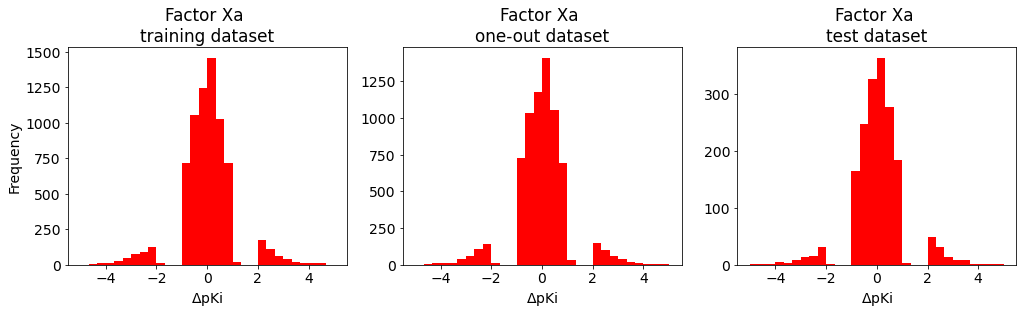

In [6]:
"""
These plots allow us to check that distributions between full, train, test, and one-out
datasets are extremely similar.
"""
datasets = {'full':full_yr, 'training':train_yr, 'one-out':one_yr, 'test':test_yr}

fig,axs = plt.subplots(1,3, figsize=(17,4))
axs[0].hist(datasets['training'], bins=30, color='r', range=(-5,5))
axs[0].set(title='Factor Xa \n'+'training'+' dataset', ylabel="Frequency", xlabel=r"$\Delta$pKi")
axs[1].hist(datasets['one-out'], bins=30, color='r', range=(-5,5))
axs[1].set(title='Factor Xa \n'+'one-out'+' dataset', xlabel=r"$\Delta$pKi")
axs[2].hist(datasets['test'], bins=30, color='r', range=(-5,5))
axs[2].set(title='Factor Xa \n'+'test'+' dataset', xlabel=r"$\Delta$pKi")

fig.savefig("./plots/pKi_hist_1.png")

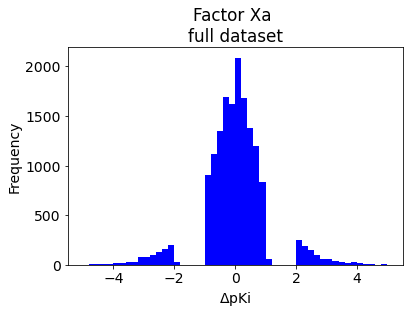

In [7]:
fig,axs = plt.subplots(1,1, figsize=(6,4))
axs.hist(datasets['full'], bins=50, color='b', range=(-5,5))
axs.set(title='Factor Xa \n'+'full'+' dataset', ylabel="Frequency", xlabel=r"$\Delta$pKi")

fig.savefig("./plots/pKi_hist_2")

### Frequency by |pKi diff|

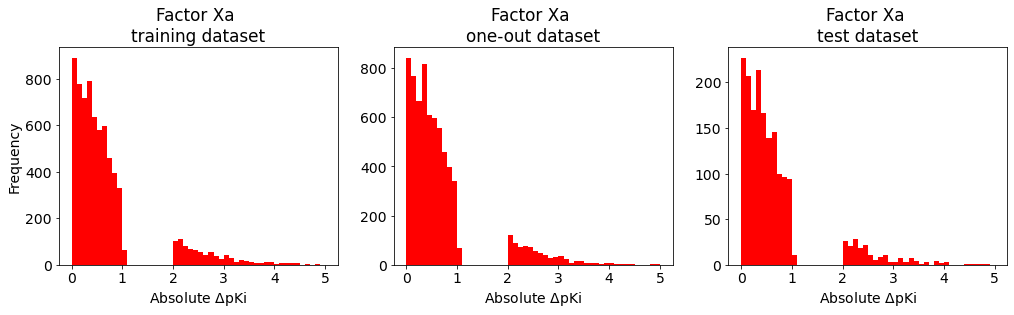

In [10]:
# in |pKi diff|
datasets = {'full':abs_full_yr, 'training':abs_train_yr, 'one-out':abs_one_yr, 'test':abs_test_yr}

fig,axs = plt.subplots(1,3, figsize=(17,4))
axs[0].hist(datasets['training'], bins=50, color='r', range=(0,5))
axs[0].set(title='Factor Xa \n'+'training'+' dataset', ylabel="Frequency", xlabel=r"Absolute $\Delta$pKi")
axs[1].hist(datasets['one-out'], bins=50, color='r', range=(0,5))
axs[1].set(title='Factor Xa \n'+'one-out'+' dataset', xlabel=r"Absolute $\Delta$pKi")
axs[2].hist(datasets['test'], bins=50, color='r', range=(0,5))
axs[2].set(title='Factor Xa \n'+'test'+' dataset', xlabel=r"Absolute $\Delta$pKi")

fig.savefig("./plots/pKi_hist_abs_1.png")

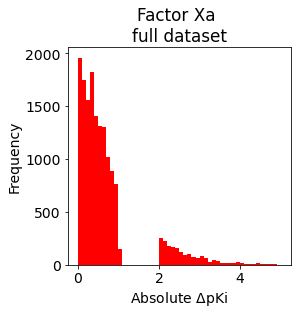

In [11]:
fig,axs = plt.subplots(1,1, figsize=(4,4))
axs.hist(datasets['full'], bins=50, color='b', range=(0,5))
axs.set(title='Factor Xa \n'+'full'+' dataset', ylabel="Frequency", xlabel=r"Absolute $\Delta$pKi")

fig.savefig("./plots/pKi_hist_abs_2.png")

## II. Multiplicity of ligands in each set

In [ ]:
# Occurences tracks number of occurences for each unique ligand in all sets
occurences = {}
for c,s in enumerate([full_smiles, train_smiles, one_smiles, test_smiles]):
    lig_dict = {}
    for lig in s:
        try:
            lig_dict[lig]+=1
        except: 
            lig_dict[lig]=1

    occurences[c] = list(lig_dict.values())

In [ ]:
# 2844 unique ligands appear in the full set

pd.Series(occurences[0]).describe()

### Histograms

In [ ]:
fig,axs = plt.subplots(1,3, figsize=(17,4))
axs[0].hist(occurences[1], bins=50, color='b')
axs[0].set(title='Factor Xa \n'+'training'+' dataset', ylabel="Frequency", xlabel="Number of occurences \n of ligand")
axs[1].hist(occurences[2], bins=50, color='b')
axs[1].set(title='Factor Xa \n'+'one-out'+' dataset', ylabel="Frequency", xlabel="Number of occurences \n of ligand")
axs[2].hist(occurences[3], bins=30, color='b')
axs[2].set(title='Factor Xa \n'+'test'+' dataset', ylabel="Frequency", xlabel="Number of occurences \n of ligand")

fig.savefig("./plots/lig_freq_1.png")

In [ ]:
fig,axs = plt.subplots(1,1, figsize=(6,4))
axs.hist(occurences[0], bins=80, color='b')
axs.set(title='Factor Xa \n'+'full'+' dataset', ylabel="Frequency", xlabel="Number of occurences \n of ligand")

fig.savefig("./plots/lig_freq_2.png")